<a href="https://colab.research.google.com/github/Ebonica/CODE-CRAFTERS-DATA-SCIENCE-EBONICA-SALETH/blob/main/CODE_CRAFTERS_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODE CRAFTERS TASK3 DATA SCIENCE AND MACHINE LEARNING**

**CUSTOMER CHURN PREDICTION MODEL USING DECISION TREES**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE GIVEN DATASET**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


**READING THE GIVEN DATASET**

In [3]:
data=pd.read_csv("Churn_Modelling.csv")

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**DATA EXPLORATION**

In [5]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9

In [6]:
print("Last few rows of the dataset:")
print(data.tail())

Last few rows of the dataset:
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77 

In [7]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [8]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min 

In [9]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
print("\nColumns:")
print(data.columns)


Columns:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [11]:
print("\nShape:")
print(data.shape)


Shape:
(10000, 14)


In [12]:
print("\nDATA TYPES:")
print(data.dtypes)


DATA TYPES:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [13]:
print("\n Access the 21th row (index 20)")
data.iloc[20]


 Access the 21th row (index 20)


RowNumber                 21
CustomerId          15577657
Surname             McDonald
CreditScore              732
Geography             France
Gender                  Male
Age                       41
Tenure                     8
Balance                  0.0
NumOfProducts              2
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    170886.17
Exited                     0
Name: 20, dtype: object

In [14]:
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [15]:
nunique_counts = data.nunique()


for column in data.columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()

    print(f"Column: {column}")
    print(f"Number of unique values: {nunique_counts[column]}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: RowNumber
Number of unique values: 10000
Unique values: [    1     2     3 ...  9998  9999 10000]
Value counts:
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

Column: CustomerId
Number of unique values: 10000
Unique values: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Value counts:
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

Column: Surname
Number of unique values: 2932
Unique values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Value counts:
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

Column: CreditScore
Numbe

**DATA VISUALIZATION**

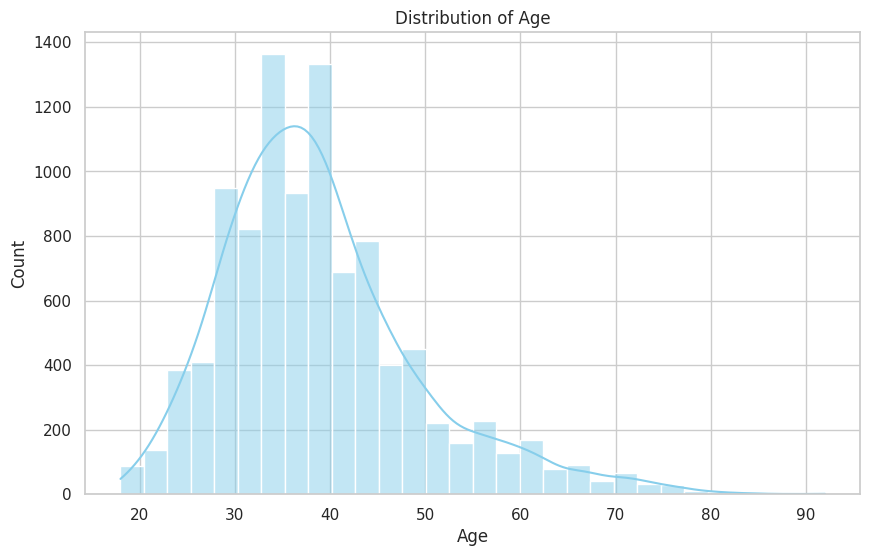

In [16]:
sns.set(style="whitegrid")

# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

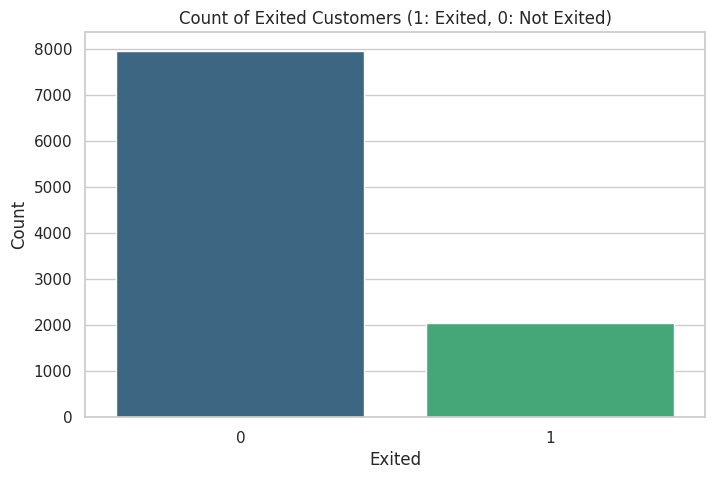

In [17]:
# Plot 2: Count of Exited Customers
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Count of Exited Customers (1: Exited, 0: Not Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

<ipython-input-18-8ec1e9ca8882>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


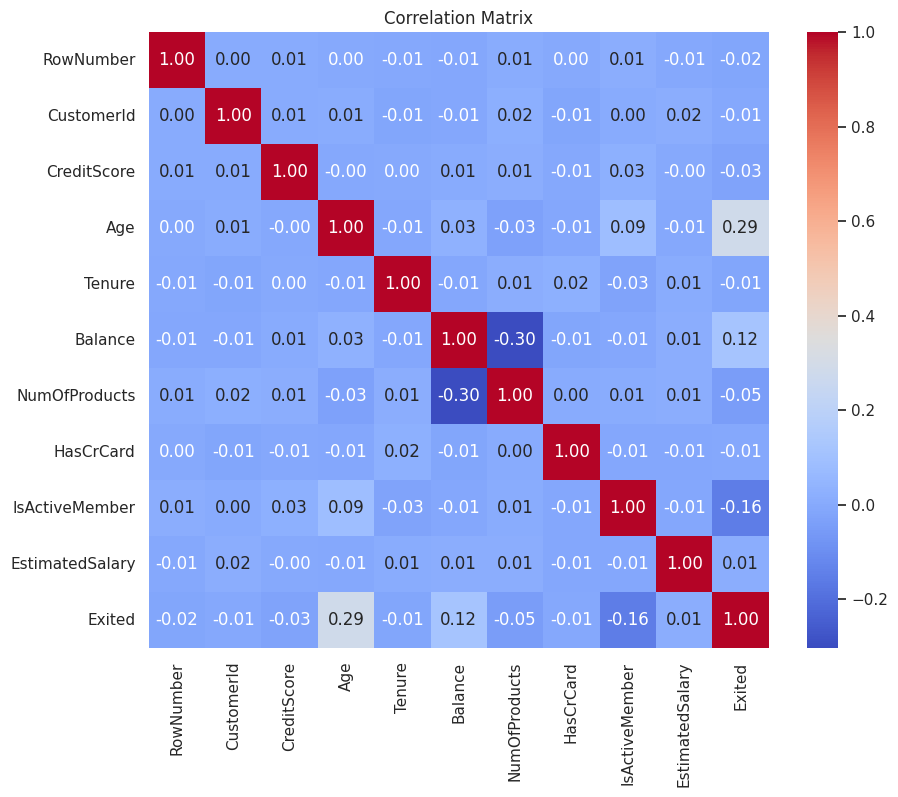

In [18]:
# Plot 3: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

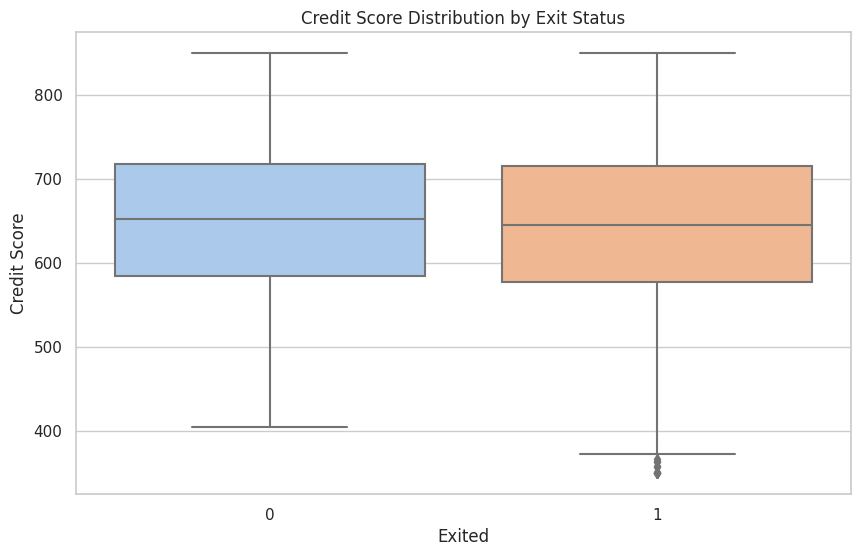

In [19]:
# Plot 4: Boxplot of Credit Score by Exit Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=data, palette='pastel')
plt.title('Credit Score Distribution by Exit Status')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.show()

**DECISION TREE CLASSIFIER**

In [26]:
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Convert categorical variables to numerical values
X['Geography'] = X['Geography'].map({'France': 0, 'Spain': 1})
X['Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test_imputed)

**EVALUATING THE PERFORMANCE**

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.782


In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[1358  249]
 [ 187  206]]


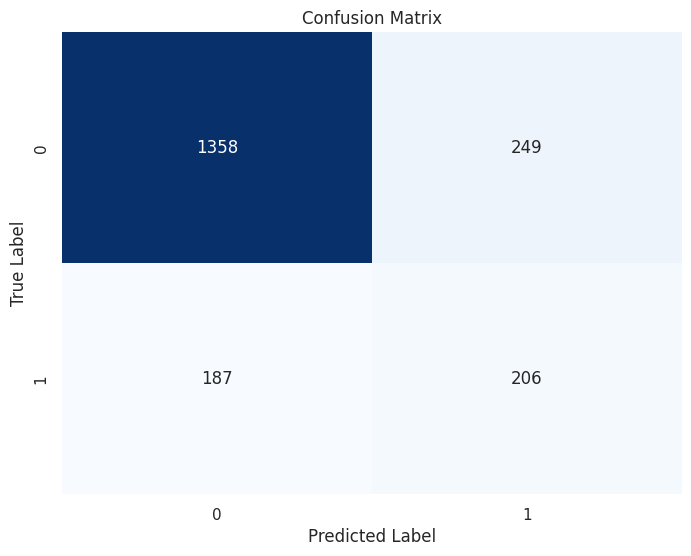

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000

